### Exploratary Data Analysis and Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
# --- Raw Data Paths (Simulated) ---
# In a real environment, these paths would point to the raw CSV files.
DF_JAN_PATH = "./data/raw/yellow_tripdata_2016-01.csv"
DF_FEB_PATH = "./data/raw/yellow_tripdata_2016-02.csv"
DF_MAR_PATH = "./data/raw/yellow_tripdata_2016-03.csv"

# Load data with necessary columns
cols_to_load = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'VendorID', 'passenger_count',
                'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
                'dropoff_latitude', 'RatecodeID', 'store_and_fwd_flag', 'fare_amount']

df_jan = pd.read_csv(DF_JAN_PATH, usecols=cols_to_load, parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"])
df_feb = pd.read_csv(DF_FEB_PATH, usecols=cols_to_load, parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"])
df_mar = pd.read_csv(DF_MAR_PATH, usecols=cols_to_load, parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"])

In [4]:
df_jan.shape, df_feb.shape, df_mar.shape

((10906858, 12), (11382049, 12), (12210952, 12))

In [5]:
# Concatenate the three months into one in-memory DataFrame
df_combined = pd.concat([df_jan, df_feb, df_mar], axis=0)
print(f"Initial combined shape: {df_combined.shape}")

Initial combined shape: (34499859, 12)


In [6]:
df_combined.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,7.5
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,18.0
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,33.0
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,16.5
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,8.0
5,2,2016-01-01 00:00:00,2016-01-01 00:18:30,2,5.52,-73.980118,40.743050,1,N,-73.913490,40.763142,19.0
6,2,2016-01-01 00:00:00,2016-01-01 00:26:45,2,7.45,-73.994057,40.719990,1,N,-73.966362,40.789871,26.0
7,1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.20,-73.979424,40.744614,1,N,-73.992035,40.753944,9.0
8,1,2016-01-01 00:00:02,2016-01-01 00:11:14,1,6.00,-73.947151,40.791046,1,N,-73.920769,40.865578,18.0
9,2,2016-01-01 00:00:02,2016-01-01 00:11:08,1,3.21,-73.998344,40.723896,1,N,-73.995850,40.688400,11.5


In [7]:
df_combined.shape

(34499859, 12)

In [8]:
# check for missing values in the data
df_combined.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
fare_amount              0
dtype: int64

In [9]:
# data types
df_combined.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RatecodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
fare_amount                     float64
dtype: object

#### Analysis

In [10]:
sns.set_style('whitegrid')

In [11]:
# Statistical Summary of numerical columns
df_combined.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,fare_amount
count,3.449986e+07,34499859,34499859,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07
mean,1.532576e+00,2016-02-16 16:28:47.850749696,2016-02-16 16:44:17.778065152,1.661700e+00,5.309408e+00,-7.283942e+01,4.012605e+01,1.039150e+00,-7.290482e+01,4.016297e+01,1.257198e+01
min,1.000000e+00,2016-01-01 00:00:00,2015-02-07 15:35:25,0.000000e+00,-3.390584e+06,-1.616987e+02,-7.703949e+01,1.000000e+00,-1.616987e+02,-7.703949e+01,-9.576000e+02
25%,1.000000e+00,2016-01-25 23:54:45,2016-01-26 00:11:38.500000,1.000000e+00,1.000000e+00,-7.399165e+01,4.073633e+01,1.000000e+00,-7.399120e+01,4.073468e+01,6.500000e+00
50%,2.000000e+00,2016-02-17 11:37:35,2016-02-17 11:54:02,1.000000e+00,1.690000e+00,-7.398153e+01,4.075343e+01,1.000000e+00,-7.397957e+01,4.075387e+01,9.000000e+00
75%,2.000000e+00,2016-03-10 00:04:20.500000,2016-03-10 00:18:53,2.000000e+00,3.100000e+00,-7.396655e+01,4.076786e+01,1.000000e+00,-7.396218e+01,4.076935e+01,1.400000e+01
max,2.000000e+00,2016-03-31 23:59:59,2016-06-29 15:58:16,9.000000e+00,1.907263e+07,9.464387e+01,6.685682e+01,9.900000e+01,3.889659e+01,4.053167e+02,4.294967e+05
std,4.989377e-01,NaN,NaN,1.316154e+00,4.672575e+03,9.090656e+00,5.007832e+00,5.564537e-01,8.828348e+00,4.863875e+00,9.179006e+01


As we can see there are negatine minimum values in features like trip_distance and fare_amount which are not suppose to be there. This is an indication that Datasets may have outliers

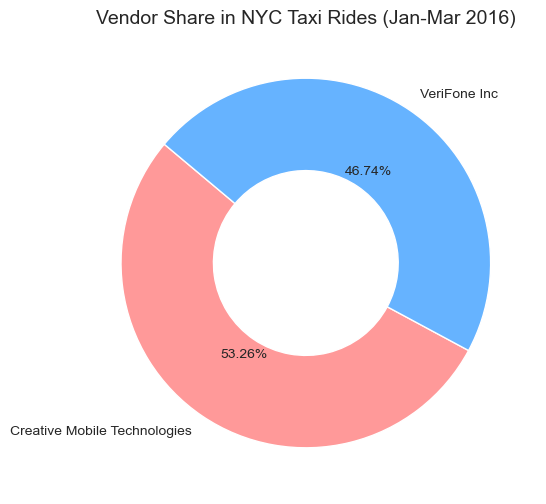

In [12]:
# pie chart of vendor share in NYC
vendor_counts = df_combined['VendorID'].value_counts(normalize=True)
plt.figure(figsize=(8, 6))
plt.pie(vendor_counts, labels=["Creative Mobile Technologies","VeriFone Inc"], autopct='%.2f%%',radius=1,wedgeprops=dict(width=0.5,edgecolor="w"), startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Vendor Share in NYC Taxi Rides (Jan-Mar 2016)', fontsize=14)
plt.show()

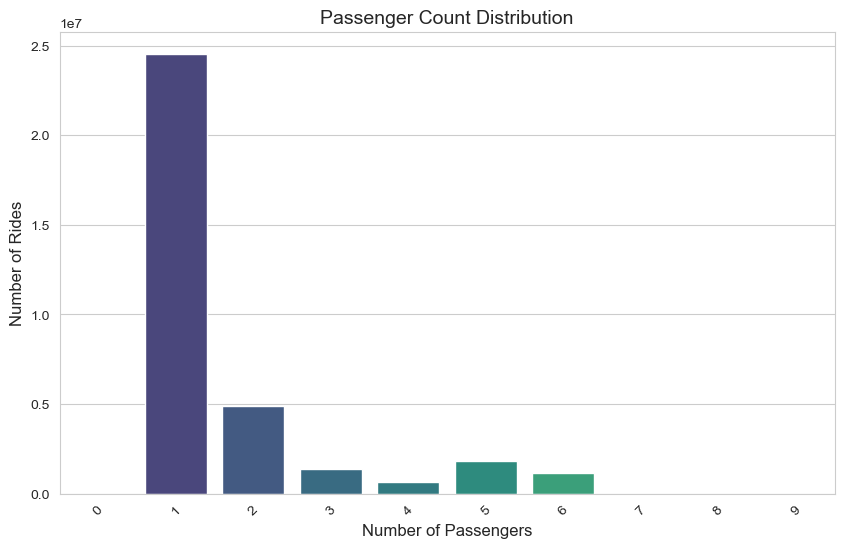

In [13]:
# Bar Chart for passenger count
passenger_counts = df_combined['passenger_count'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=passenger_counts.index, y=passenger_counts.values, palette='viridis')
plt.title('Passenger Count Distribution', fontsize=14)
plt.xlabel('Number of Passengers', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.xticks(rotation=45)
plt.show()

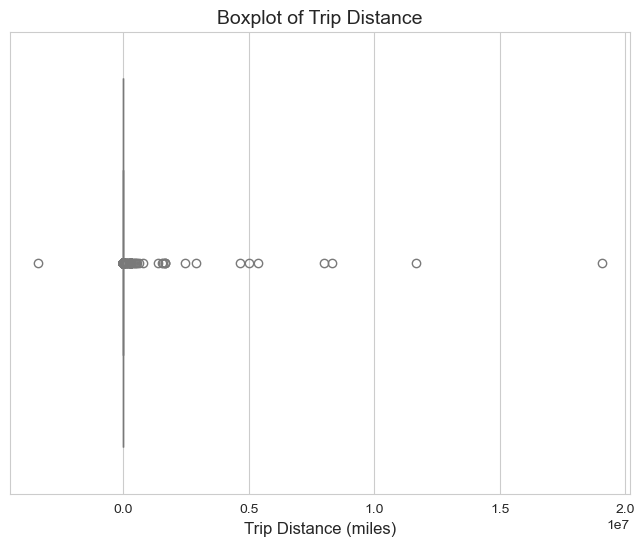

In [14]:
# Boxplot for the trip distance to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_combined.loc[:,'trip_distance'], color='lightblue')
plt.title('Boxplot of Trip Distance', fontsize=14)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.show()

In [15]:
# percentile values for trip distance

percentile_values = np.arange(0.1,1.0,0.1)
percentile_values

for percentile in percentile_values:
    print(f"The trip distance value for {int(percentile * 100)}th percentile is {df_combined['trip_distance'].quantile(q=percentile)}")

The trip distance value for 10th percentile is 0.63
The trip distance value for 20th percentile is 0.9
The trip distance value for 30th percentile is 1.1
The trip distance value for 40th percentile is 1.38
The trip distance value for 50th percentile is 1.69
The trip distance value for 60th percentile is 2.09
The trip distance value for 70th percentile is 2.67
The trip distance value for 80th percentile is 3.7
The trip distance value for 90th percentile is 6.53


In [16]:
percentile_values = np.arange(0.90,1.01,0.01)
percentile_values

for percentile in percentile_values:
    print(f"The trip distance value for {int(percentile * 100)}th percentile is {df_combined['trip_distance'].quantile(q=percentile)}")

The trip distance value for 90th percentile is 6.53
The trip distance value for 91th percentile is 7.15
The trip distance value for 92th percentile is 7.9
The trip distance value for 93th percentile is 8.7
The trip distance value for 94th percentile is 9.5
The trip distance value for 95th percentile is 10.3
The trip distance value for 96th percentile is 11.4
The trip distance value for 97th percentile is 13.45
The trip distance value for 98th percentile is 16.9
The trip distance value for 99th percentile is 18.56
The trip distance value for 100th percentile is 19072628.8


Through this process we get to know that there are only 1% of outliers in the dataset. Similar process we have done with fare_amount feature

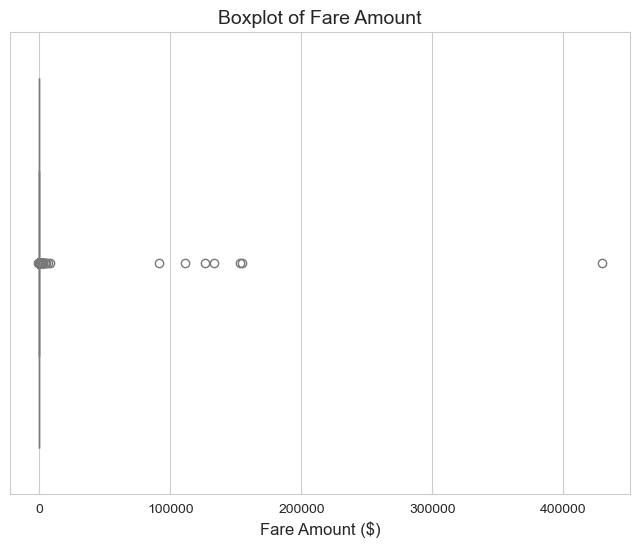

In [19]:
# Boxplot for the Fare Amount to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_combined.loc[:,'fare_amount'], color='lightblue')
plt.title('Boxplot of Fare Amount', fontsize=14)
plt.xlabel('Fare Amount ($)', fontsize=12)
plt.show()

In [20]:
# percentile values for fare amount

percentile_values = np.arange(0.1,1.1,0.1)
percentile_values

for percentile in percentile_values:
    print(f"The fare amount value for {int(percentile * 100)}th percentile is {df_combined['fare_amount'].quantile(q=percentile)}")

The fare amount value for 10th percentile is 5.0
The fare amount value for 20th percentile is 6.0
The fare amount value for 30th percentile is 7.0
The fare amount value for 40th percentile is 8.0
The fare amount value for 50th percentile is 9.0
The fare amount value for 60th percentile is 10.5
The fare amount value for 70th percentile is 13.0
The fare amount value for 80th percentile is 16.0
The fare amount value for 90th percentile is 24.0
The fare amount value for 100th percentile is 429496.72


In [22]:
percentile_values = np.arange(0.90,1.01,0.01)
percentile_values

for percentile in percentile_values:
    print(f"The fare amount value for {int(percentile * 100)}th percentile is {df_combined['fare_amount'].quantile(q=percentile)}")

The fare amount value for 90th percentile is 24.0
The fare amount value for 91th percentile is 25.0
The fare amount value for 92th percentile is 27.0
The fare amount value for 93th percentile is 29.0
The fare amount value for 94th percentile is 31.0
The fare amount value for 95th percentile is 33.5
The fare amount value for 96th percentile is 37.5
The fare amount value for 97th percentile is 44.5
The fare amount value for 98th percentile is 52.0
The fare amount value for 99th percentile is 52.0
The fare amount value for 100th percentile is 429496.72


In [23]:
# unique ids

rate_code_ids = (
    df_combined.loc[:, 'RatecodeID'].value_counts()
)

In [24]:
rate_code_ids.sort_index()

RatecodeID
1     33627000
2       697595
3        56169
4        14459
5       103481
6          320
99         835
Name: count, dtype: int64

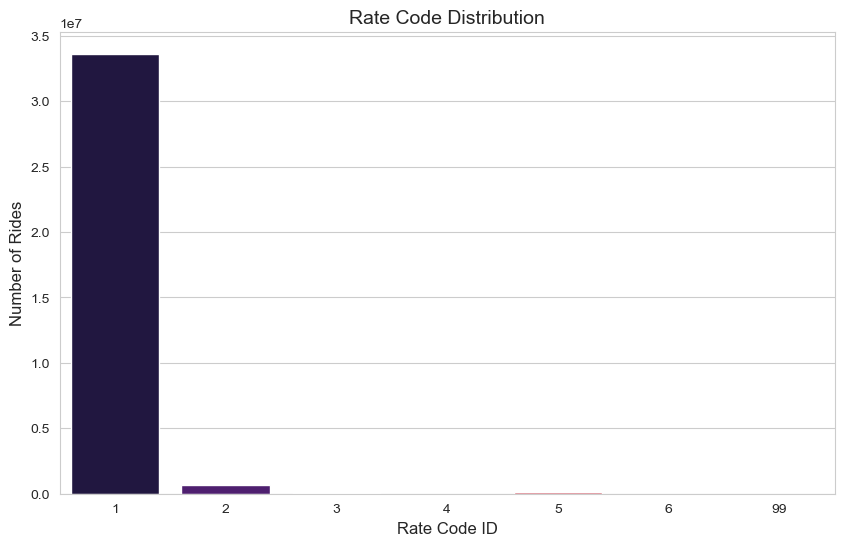

In [25]:
# plot the bar plot to display the distribution of rate codes
plt.figure(figsize=(10, 6))
sns.barplot(x=rate_code_ids.index, y=rate_code_ids.values, palette='magma')
plt.title('Rate Code Distribution', fontsize=14)
plt.xlabel('Rate Code ID', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.show()

In [26]:
# Subset of location base columns

location_subset = df_combined[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]

location_subset.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.990372,40.734695,-73.981842,40.732407
1,-73.980782,40.729912,-73.944473,40.716679
2,-73.984550,40.679565,-73.950272,40.788925
3,-73.993469,40.718990,-73.962242,40.657333
4,-73.960625,40.781330,-73.977264,40.758514


<Figure size 1200x1000 with 0 Axes>

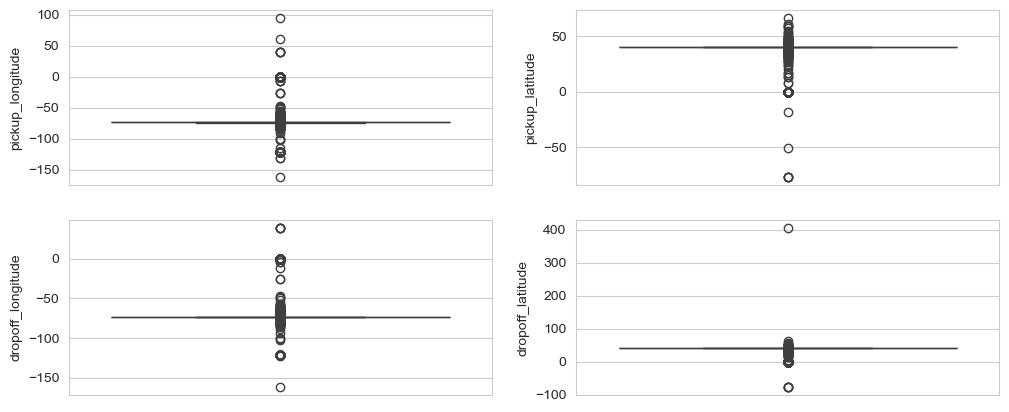

In [27]:
# Boxplots for location based columns to identify outliers
plt.figure(figsize=(12, 10))
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, figsize=(12,5))
for i in range(4):
    if i <= 1:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i],ax=ax1[i])
    else:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i],ax=ax2[i - 2])

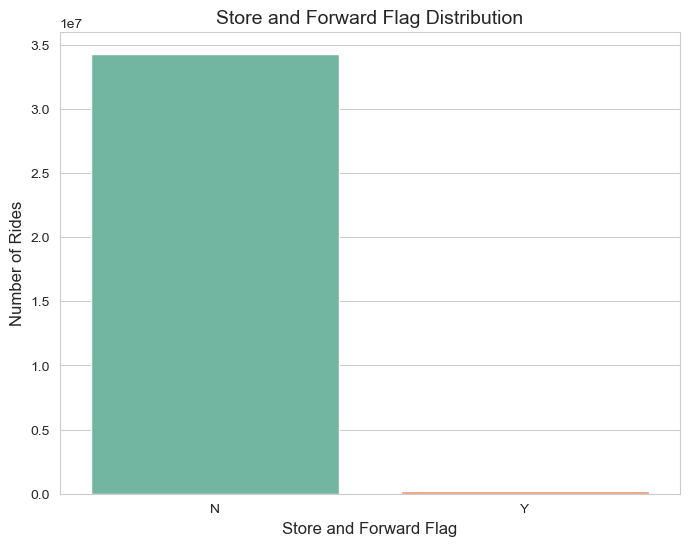

In [28]:
# count plot for store and fwd flag
store_fwd_counts = df_combined['store_and_fwd_flag'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=store_fwd_counts.index, y=store_fwd_counts.values,
            palette='Set2')
plt.title('Store and Forward Flag Distribution', fontsize=14)
plt.xlabel('Store and Forward Flag', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.show()

In [29]:
# convert the columns to datetime
df_combined['tpep_pickup_datetime'] = pd.to_datetime(df_combined['tpep_pickup_datetime'],yearfirst=True,format='mixed')
df_combined['tpep_dropoff_datetime'] = pd.to_datetime(df_combined['tpep_dropoff_datetime'],yearfirst=True,format='mixed')

In [30]:
# Create new columns for pickup and dropoff hour, day and month
df_combined['pickup_hour'] = df_combined['tpep_pickup_datetime'].dt.hour
df_combined['pickup_day_of_week'] = df_combined['tpep_pickup_datetime'].dt.dayofweek
df_combined['pickup_month'] = df_combined['tpep_pickup_datetime'].dt.month

In [31]:
df_combined.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'pickup_hour',
       'pickup_day_of_week', 'pickup_month'],
      dtype='object')

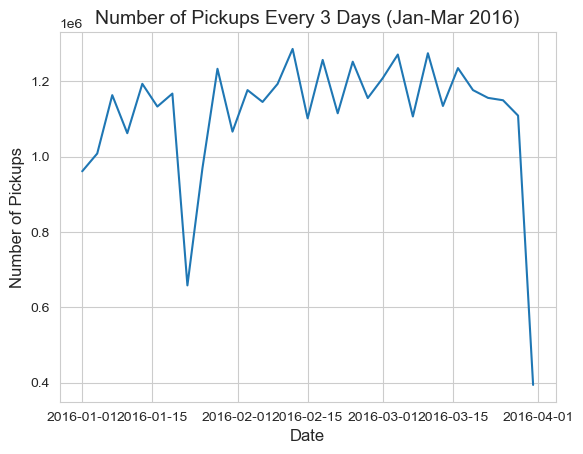

In [32]:
# plot the number of pickups
pickup_every_3_days = (
    df_combined.set_index('tpep_pickup_datetime')
    .resample('3D')
    .size()
)

sns.lineplot(x=pickup_every_3_days.index, y=pickup_every_3_days.values)
plt.title('Number of Pickups Every 3 Days (Jan-Mar 2016)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.show()

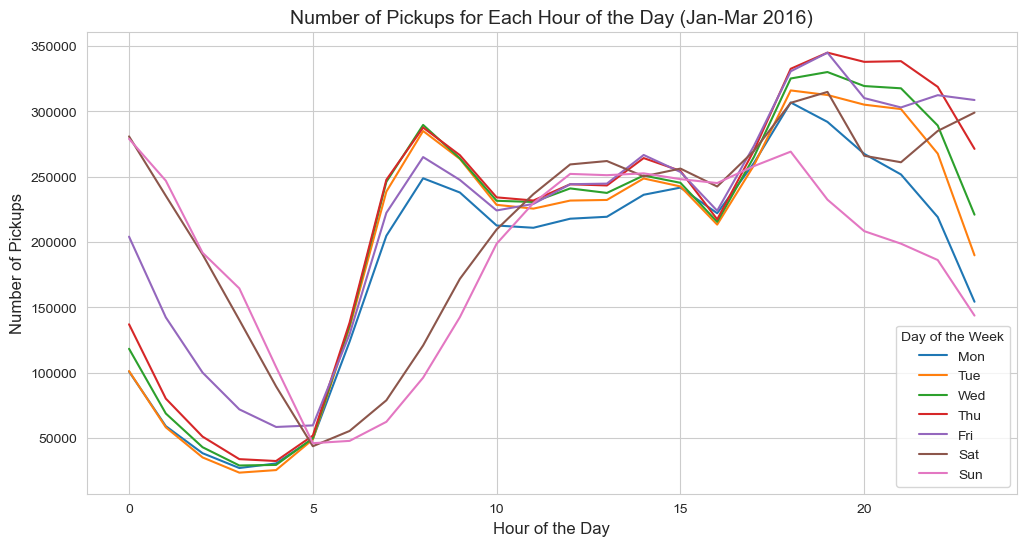

In [33]:
# pickups for each hour of the day

pickups_each_hour = (
    df_combined.groupby(['pickup_hour','pickup_day_of_week'])["VendorID"]
    .size()
)
pickups_each_hour = pickups_each_hour.reset_index()

pickups_each_hour.rename(columns={"VendorID":"Number of Pickups"},inplace=True)

day_names = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]

replacement_mapper = {k:v for k,v in enumerate(day_names)}

pickups_each_hour.replace({"pickup_day_of_week":replacement_mapper},inplace=True)

# plot the lineplot for pickups each hour of the day
plt.figure(figsize=(12, 6))
sns.lineplot(data=pickups_each_hour, x='pickup_hour', y='Number of Pickups', hue='pickup_day_of_week',hue_order=day_names, palette='tab10')
plt.title('Number of Pickups for Each Hour of the Day (Jan-Mar 2016)', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.legend(title='Day of the Week')
plt.show()

### Removing Outliers

#### New york bounding box:
min_latitude = 40.60

max_latitude = 40.85

min_longitude = -74.05

max_longitude = -73.70

In [34]:
# set the values of coordinates

min_latitude = 40.60
max_latitude = 40.85
min_longitude = -74.05
max_longitude = -73.70

In [35]:
# fare amount column
fare_amount = df_combined["fare_amount"]

# trip distance column
trip_distance = df_combined["trip_distance"]

In [36]:
# percentile values for fare amount

percentile_values = np.arange(0.991,1.000, 0.001)
percentile_values

fare_amount.quantile(percentile_values)

0.991        52.00
0.992        52.00
0.993        52.00
0.994        52.00
0.995        54.00
0.996        58.50
0.997        63.00
0.998        69.00
0.999        81.00
1.000    429496.72
Name: fare_amount, dtype: float64

In [37]:
max_fare_amount_val = fare_amount.quantile(percentile_values).iloc[-2].item()
min_fare_amount_val = 0.50

print(min_fare_amount_val)
print(max_fare_amount_val)

0.5
81.0


In [38]:
trip_distance.quantile(percentile_values)

0.991          18.80
0.992          19.00
0.993          19.30
0.994          19.63
0.995          20.04
0.996          20.51
0.997          21.10
0.998          21.90
0.999          24.43
1.000    19072628.80
Name: trip_distance, dtype: float64

In [39]:
# percentile values for trip_distance

min_trip_distance_val = 0.25
max_trip_distance_val = trip_distance.quantile(percentile_values).iloc[-2].item()

print(min_trip_distance_val)
print(max_trip_distance_val)

0.25
24.43


In [40]:
# Removing the outliers from dataset
df_combined = df_combined.loc[(df_combined["pickup_latitude"].between(min_latitude, max_latitude, inclusive="both")) & 
(df_combined["pickup_longitude"].between(min_longitude, max_longitude, inclusive="both")) & 
(df_combined["dropoff_latitude"].between(min_latitude, max_latitude, inclusive="both")) & 
(df_combined["dropoff_longitude"].between(min_longitude, max_longitude, inclusive="both")), :]

In [41]:
df_combined = df_combined.loc[(df_combined["fare_amount"].between(min_fare_amount_val,max_fare_amount_val,inclusive="both")) & 
(df_combined["trip_distance"].between(min_trip_distance_val,max_trip_distance_val,inclusive="both"))]

In [42]:
df_combined.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,fare_amount,pickup_hour,pickup_day_of_week,pickup_month
count,3.323420e+07,33234199,33234199,3.323420e+07,3.323420e+07,3.323420e+07,3.323420e+07,3.323420e+07,3.323420e+07,3.323420e+07,3.323420e+07,3.323420e+07,3.323420e+07,3.323420e+07
mean,1.537553e+00,2016-02-16 16:34:30.764269568,2016-02-16 16:50:00.858427904,1.667033e+00,2.829389e+00,-7.397406e+01,4.075107e+01,1.022633e+00,-7.397388e+01,4.075148e+01,1.220727e+01,1.366308e+01,3.039039e+00,2.037936e+00
min,1.000000e+00,2016-01-01 00:00:00,2015-02-07 15:35:25,0.000000e+00,2.500000e-01,-7.404997e+01,4.060001e+01,1.000000e+00,-7.405000e+01,4.060000e+01,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,2016-01-26 00:11:50.500000,2016-01-26 00:28:35.500000,1.000000e+00,1.000000e+00,-7.399182e+01,4.073758e+01,1.000000e+00,-7.399133e+01,4.073618e+01,6.500000e+00,9.000000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,2016-02-17 11:45:53,2016-02-17 12:01:56,1.000000e+00,1.700000e+00,-7.398187e+01,4.075408e+01,1.000000e+00,-7.398002e+01,4.075438e+01,9.000000e+00,1.400000e+01,3.000000e+00,2.000000e+00
75%,2.000000e+00,2016-03-10 00:09:22,2016-03-10 00:24:23,2.000000e+00,3.070000e+00,-7.396783e+01,4.076812e+01,1.000000e+00,-7.396376e+01,4.076937e+01,1.400000e+01,1.900000e+01,5.000000e+00,3.000000e+00
max,2.000000e+00,2016-03-31 23:59:59,2016-06-29 15:58:16,9.000000e+00,2.443000e+01,-7.370015e+01,4.085000e+01,9.900000e+01,-7.370000e+01,4.085000e+01,8.100000e+01,2.300000e+01,6.000000e+00,3.000000e+00
std,4.985878e-01,NaN,NaN,1.321733e+00,3.342202e+00,3.675237e-02,2.722268e-02,2.703973e-01,3.229071e-02,2.990245e-02,9.422066e+00,6.338592e+00,1.947355e+00,8.177324e-01


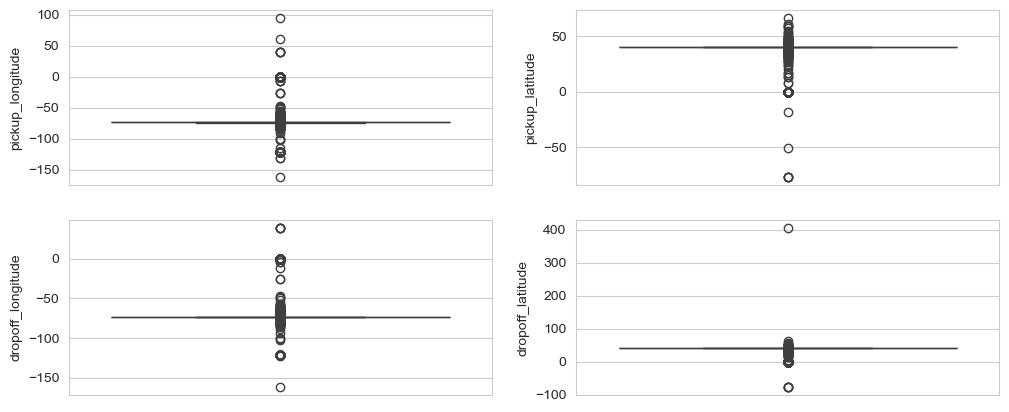

In [43]:
# boxplots for location based columns

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, figsize=(12,5))
for i in range(4):
    if i <= 1:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i],ax=ax1[i],whis=3)
    else:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i],ax=ax2[i - 2],whis=3)

<Axes: ylabel='trip_distance'>

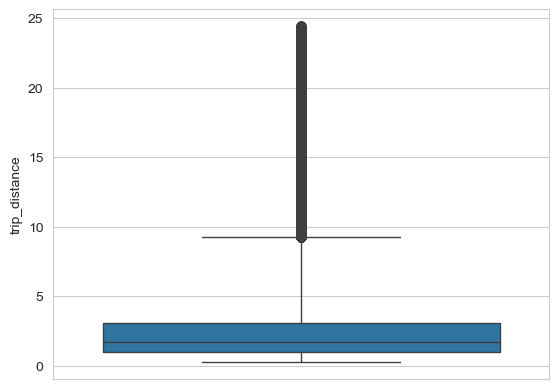

In [44]:
# Boxplot for the trip Distance
sns.boxplot(df_combined.loc[:,"trip_distance"], whis=3)

<Axes: ylabel='fare_amount'>

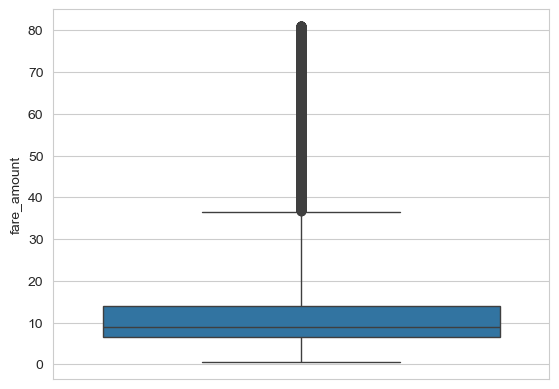

In [45]:
# boxplot for the fare amount

sns.boxplot(df_combined.loc[:,"fare_amount"], whis=3)

In [50]:
# save the pickup coordinates dataset

save_path = "./data/interim/location_data.csv"

pickup_coord_dataset = df_combined.loc[:,['pickup_latitude','pickup_longitude']]

In [51]:
# form the dataset

pickup_coord_dataset = df_combined.loc[:,['pickup_latitude','pickup_longitude']]

print("Shape of the dataset is ", pickup_coord_dataset.shape)

Shape of the dataset is  (33234199, 2)


### Spatial Segmentaiong of NYC into Regions Using Clustering

In [84]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler

In [85]:
# do sampling

data_path = "./data/interim/location_data.csv"

all_samples = []
df_reader = pd.read_csv(data_path, chunksize=100000)
for df in df_reader:
     all_samples.append(df.sample(500))

sample_df = pd.concat(all_samples,axis=0)
sample_df.shape

(166500, 2)

Text(0, 0.5, 'Longitude')

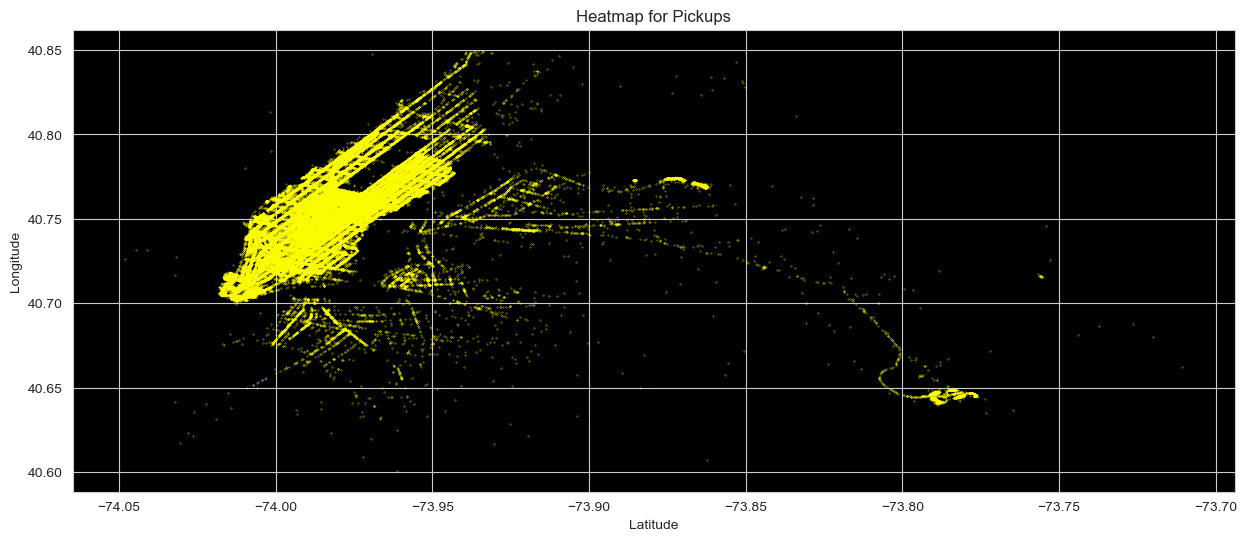

In [86]:
# plot the dataset on a scatterplot

fig,ax = plt.subplots(nrows=1,ncols=1,sharey=True,
                     figsize=(15,6))

ax.set_facecolor('k')
ax.scatter(sample_df['pickup_longitude'],sample_df['pickup_latitude'],s=0.05,color='yellow')
ax.set_title('Heatmap for Pickups')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

In [87]:
from sklearn import set_config

set_config(transform_output='pandas')

In [88]:
# scale the input columns

from sklearn.preprocessing import StandardScaler

scale_samples = StandardScaler()

scaled_sample_df = scale_samples.fit_transform(sample_df)

In [89]:
scaled_sample_df

,pickup_latitude,pickup_longitude
40063,0.177101,-0.189925
99989,1.208628,-0.155940
12188,-0.633182,-0.779837
59102,-0.003621,-0.347892
38255,-0.767171,-0.415233
...,...,...
33212896,0.063444,-0.153213
33203994,-0.530820,-0.731587
33202166,0.389450,-0.023986
33217552,0.797062,-0.326704


Text(0, 0.5, 'Longitude')

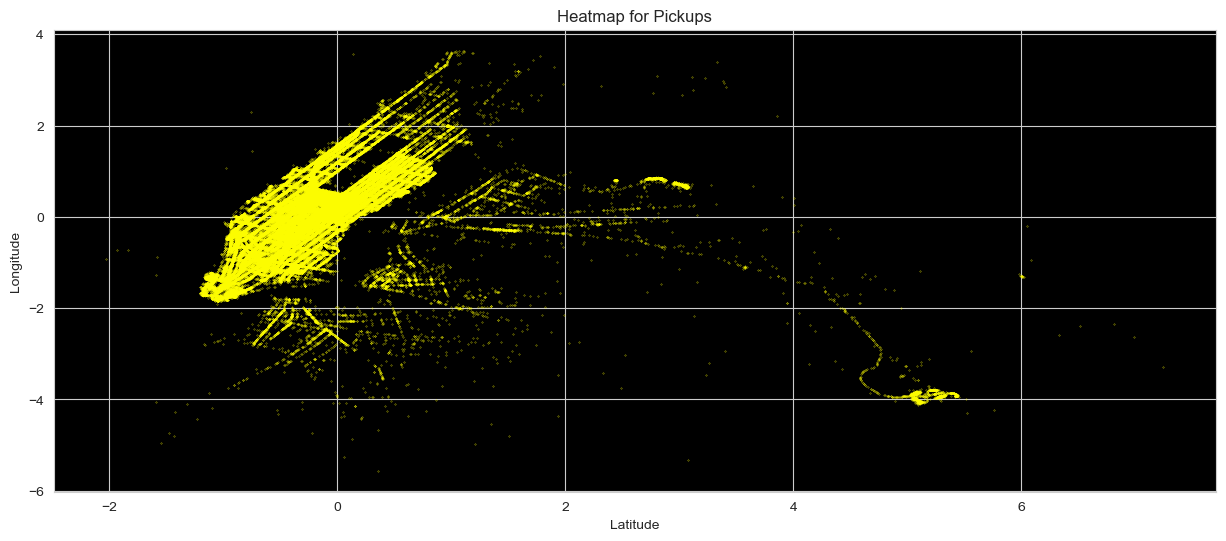

In [90]:
# plot the dataset on a scatterplot

fig,ax = plt.subplots(nrows=1,ncols=1,sharey=True,
                     figsize=(15,6))

ax.set_facecolor('k')
ax.scatter(scaled_sample_df['pickup_longitude'],scaled_sample_df['pickup_latitude'],s=0.05,color='yellow')
ax.set_title('Heatmap for Pickups')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

In [91]:
# train the standard scaler
df_reader = pd.read_csv(data_path, chunksize=100000)
scaler = StandardScaler()

for chunk in df_reader:
    # fit the scaler
    coords = chunk[["pickup_longitude", "pickup_latitude"]]
    scaler.partial_fit(coords)

In [92]:
# --- Helper Functions ---

# Haversine distance function (in km)
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371 # Earth radius in km
    lat1_rad, lon1_rad = np.radians(lat1), np.radians(lon1)
    lat2_rad, lon2_rad = np.radians(lat2), np.radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

# Custom function to select optimum K using chunking and partial_fit (adapted for in-memory data)
def select_optimum_k( k_values):
    """Evaluates K by simulating data chunking and using partial_fit, based on the 
    percentage of regions whose average distance to 8 nearest neighbors falls between 
    1.0 km and 1.5 km."""
    
    for k in k_values:
        df_reader = pd.read_csv(data_path, chunksize=100000)
        mini_batch = MiniBatchKMeans(n_clusters=k, n_init=10, random_state=42)
        
        for chunk in df_reader:
            # scale the chunk
            coords = chunk[["pickup_longitude", "pickup_latitude"]]
            scaled_chunk = scaler.transform(coords)
            # train the model
            mini_batch.partial_fit(scaled_chunk)
            
        # centroid values
        centroids = scaler.inverse_transform(mini_batch.cluster_centers_)
        # calculate distances
        all_distances = []
        for i in centroids:
            distances = []
            for j in centroids:
                distance = haversine_distance(i[0], i[1], j[0], j[1])
                distances.append(distance)
            all_distances.append(distances)
        all_distances = np.array(all_distances)
        # sort array
        sorted_distances = np.sort(all_distances, axis=-1)
        # nearby regions
        region_count = 8
        # selected distances
        selected_distances = sorted_distances[:, 1:region_count+1]
        # average distances
        avg_distances = selected_distances.mean(axis=1)
        # count averages that fit criteria
        counter = ((avg_distances >= 1.0) & (avg_distances <= 1.5)).sum()
        percentage = ((avg_distances >= 1.0) & (avg_distances <= 1.5)).mean()
        print(f"For {k} clusters, the number of nearby regions that fits criteria are {counter} and is {percentage * 100:.1f}% regions of total")
    

In [93]:
# Select optimum K values
possible_k_values = np.arange(10,100,10)

select_optimum_k(k_values=possible_k_values)


For 10 clusters, the number of nearby regions that fits criteria are 0 and is 0.0% regions of total
For 20 clusters, the number of nearby regions that fits criteria are 5 and is 25.0% regions of total
For 30 clusters, the number of nearby regions that fits criteria are 7 and is 23.3% regions of total
For 40 clusters, the number of nearby regions that fits criteria are 11 and is 27.5% regions of total


KeyboardInterrupt: 

In [77]:
df_reader = pd.read_csv(data_path, chunksize=100000)
mini_batch = MiniBatchKMeans(n_clusters=30, n_init=10, random_state=42)

for chunk in df_reader:
    coords = chunk[["pickup_longitude", "pickup_latitude"]]
    scaled_chunk = scaler.transform(coords)           
    mini_batch.partial_fit(scaled_chunk)

In [78]:
scaler.inverse_transform(mini_batch.cluster_centers_).shape

(30, 2)

In [79]:
location_subset = df_combined.loc[:, ["pickup_longitude", "pickup_latitude"]]
location_subset

,pickup_longitude,pickup_latitude
0,-73.990372,40.734695
1,-73.980782,40.729912
2,-73.984550,40.679565
3,-73.993469,40.718990
4,-73.960625,40.781330
...,...,...
12210944,-73.790565,40.644451
12210945,-73.788055,40.641483
12210946,-73.789154,40.646736
12210948,-73.977356,40.774471


In [80]:
# scale the input data

scaled_location_subset = scaler.transform(location_subset)

scaled_location_subset

,pickup_longitude,pickup_latitude
0,-0.443778,-0.601549
1,-0.182839,-0.777271
2,-0.285388,-2.626699
3,-0.528059,-1.178462
4,0.365612,1.111533
...,...,...
12210944,4.992775,-3.916590
12210945,5.061072,-4.025611
12210946,5.031179,-3.832653
12210948,-0.089631,0.859580


In [81]:
# get the cluster predictions

cluster_predictions = mini_batch.predict(scaled_location_subset)

cluster_predictions.shape

(33234199,)

In [82]:
np.unique(cluster_predictions)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int32)

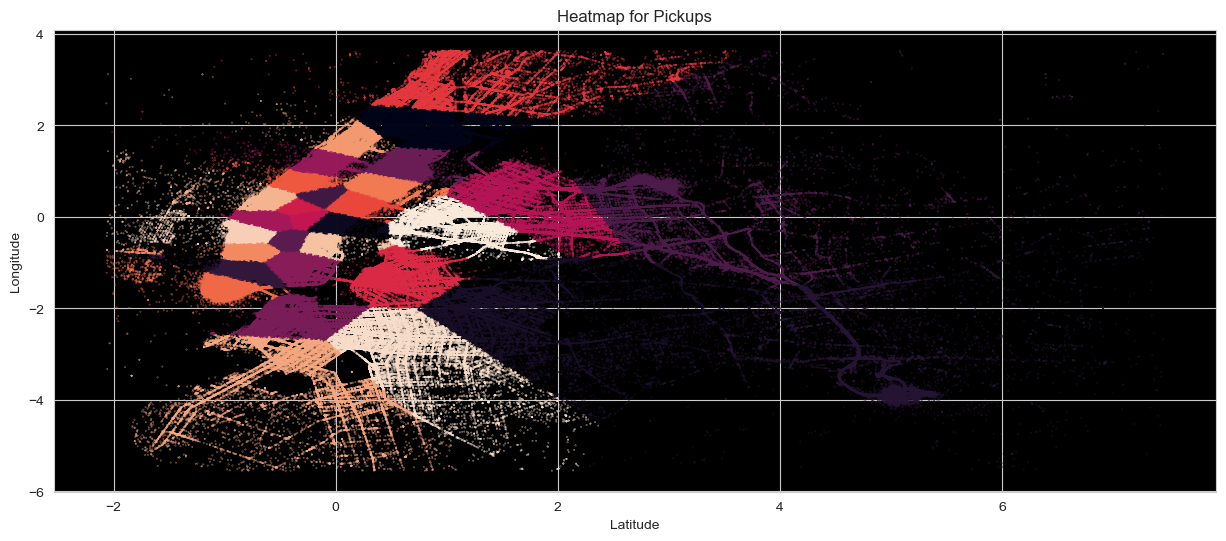

In [94]:
# plot the dataset on a scatterplot

fig,ax = plt.subplots(nrows=1,ncols=1,sharey=True,
                     figsize=(15,6))

ax.set_facecolor('k')
ax.scatter(scaled_location_subset['pickup_longitude'],scaled_location_subset['pickup_latitude'],
           s=0.05,c=cluster_predictions)
ax.set_title('Heatmap for Pickups')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

plt.show()

#### Creating Historical Data

In [95]:
# drop columns from the data

df_final = df_combined.drop(columns=['trip_distance', 'dropoff_longitude', 'dropoff_latitude', 'fare_amount','passenger_count','RatecodeID','store_and_fwd_flag','tpep_dropoff_datetime'])

In [96]:
df_final.head()

,VendorID,tpep_pickup_datetime,pickup_longitude,pickup_latitude,pickup_hour,pickup_day_of_week,pickup_month
0,2,2016-01-01,-73.990372,40.734695,0,4,1
1,2,2016-01-01,-73.980782,40.729912,0,4,1
2,2,2016-01-01,-73.984550,40.679565,0,4,1
3,2,2016-01-01,-73.993469,40.718990,0,4,1
4,2,2016-01-01,-73.960625,40.781330,0,4,1


In [97]:
# save the cluster predictions in data

df_final['region'] = cluster_predictions

df_final.head()

,VendorID,tpep_pickup_datetime,pickup_longitude,pickup_latitude,pickup_hour,pickup_day_of_week,pickup_month,region
0,2,2016-01-01,-73.990372,40.734695,0,4,1,7
1,2,2016-01-01,-73.980782,40.729912,0,4,1,26
2,2,2016-01-01,-73.984550,40.679565,0,4,1,9
3,2,2016-01-01,-73.993469,40.718990,0,4,1,10
4,2,2016-01-01,-73.960625,40.781330,0,4,1,8


In [98]:
# drop the latitude and logitude columns from data

time_series_data = df_final.drop(columns=["VendorID","pickup_latitude","pickup_longitude","pickup_hour","pickup_day_of_week","pickup_month"])

time_series_data

,tpep_pickup_datetime,region
0,2016-01-01 00:00:00,7
1,2016-01-01 00:00:00,26
2,2016-01-01 00:00:00,9
3,2016-01-01 00:00:00,10
4,2016-01-01 00:00:00,8
...,...,...
12210944,2016-03-31 21:43:11,3
12210945,2016-03-20 08:45:16,3
12210946,2016-03-20 08:59:21,3
12210948,2016-03-26 03:02:32,19


In [100]:
# save the time series data

save_path = "./data/interim/time_series.csv"

time_series_data.to_csv(save_path, index=False)

In [101]:
# set the time series as the index

time_series_data.set_index('tpep_pickup_datetime', inplace=True)

time_series_data

,region
tpep_pickup_datetime,
2016-01-01 00:00:00,7
2016-01-01 00:00:00,26
2016-01-01 00:00:00,9
2016-01-01 00:00:00,10
2016-01-01 00:00:00,8
...,...
2016-03-31 21:43:11,3
2016-03-20 08:45:16,3
2016-03-20 08:59:21,3


In [102]:
# group the time series data based on regions

region_grp = time_series_data.groupby("region")

region_grp

In [103]:
# resample the time series in 15 minute intervals

resampled_data = (
    region_grp['region']
    .resample("15min")
    .count()
)

resampled_data

region  tpep_pickup_datetime
0       2016-01-01 00:00:00      58
        2016-01-01 00:15:00     120
        2016-01-01 00:30:00     149
        2016-01-01 00:45:00     160
        2016-01-01 01:00:00     187
                               ... 
29      2016-03-31 22:45:00      14
        2016-03-31 23:00:00      17
        2016-03-31 23:15:00      18
        2016-03-31 23:30:00      13
        2016-03-31 23:45:00      14
Name: region, Length: 262080, dtype: int64

In [104]:
resampled_data.name = "total_pickups"

resampled_data = resampled_data.reset_index(level=0)

resampled_data

,region,total_pickups
tpep_pickup_datetime,,
2016-01-01 00:00:00,0,58
2016-01-01 00:15:00,0,120
2016-01-01 00:30:00,0,149
2016-01-01 00:45:00,0,160
2016-01-01 01:00:00,0,187
...,...,...
2016-03-31 22:45:00,29,14
2016-03-31 23:00:00,29,17
2016-03-31 23:15:00,29,18


In [105]:
# zeros in the data

(resampled_data['total_pickups'] == 0).sum()

np.int64(3668)

In [106]:
epsilon_val = 10

resampled_data.replace({'total_pickups': {0 : epsilon_val}}, inplace=True)

In [107]:
(resampled_data['total_pickups'] == 0).sum()

np.int64(0)

In [108]:
# Smoothing the time series data using EWMA method

from sklearn.metrics import mean_absolute_percentage_error

smoothing_values = np.arange(0.2,1,0.1)

def calculate_best_smoothing_value(values):
    y = resampled_data['total_pickups'].values
    for value in values:
        y_pred = resampled_data['total_pickups'].ewm(alpha=value).mean()
        error = mean_absolute_percentage_error(y, y_pred)
        print(f"For smoothing value {value:.1f}, the MAPE is {error:.2f}")

calculate_best_smoothing_value(smoothing_values)

For smoothing value 0.2, the MAPE is 0.41
For smoothing value 0.3, the MAPE is 0.27
For smoothing value 0.4, the MAPE is 0.20
For smoothing value 0.5, the MAPE is 0.16
For smoothing value 0.6, the MAPE is 0.12
For smoothing value 0.7, the MAPE is 0.09
For smoothing value 0.8, the MAPE is 0.06
For smoothing value 0.9, the MAPE is 0.03


In [109]:
# dataset with pickup smoothing applied

resampled_data["avg_pickups"] = resampled_data['total_pickups'].ewm(alpha=0.4).mean().round()

resampled_data

,region,total_pickups,avg_pickups
tpep_pickup_datetime,,,
2016-01-01 00:00:00,0,58,58.0
2016-01-01 00:15:00,0,120,97.0
2016-01-01 00:30:00,0,149,123.0
2016-01-01 00:45:00,0,160,140.0
2016-01-01 01:00:00,0,187,161.0
...,...,...,...
2016-03-31 22:45:00,29,14,16.0
2016-03-31 23:00:00,29,17,16.0
2016-03-31 23:15:00,29,18,17.0


In [111]:
# save the resampled data

resampled_data_save_path = "./data/interim/final_data.csv"

resampled_data.to_csv(resampled_data_save_path, index=True)

In [112]:
# shape of the data

resampled_data.shape

(262080, 3)

In [114]:
data_path = "./data/interim/final_data.csv"

df = pd.read_csv(data_path,parse_dates=["tpep_pickup_datetime"])

In [115]:
# extract the day of week information
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_of_week

# extract the month information
df['month'] = df['tpep_pickup_datetime'].dt.month

# set the datetime column as index
df.set_index('tpep_pickup_datetime', inplace=True)

df.head()

,region,total_pickups,avg_pickups,day_of_week,month
tpep_pickup_datetime,,,,,
2016-01-01 00:00:00,0,58,58.0,4,1
2016-01-01 00:15:00,0,120,97.0,4,1
2016-01-01 00:30:00,0,149,123.0,4,1
2016-01-01 00:45:00,0,160,140.0,4,1
2016-01-01 01:00:00,0,187,161.0,4,1


In [116]:
# create the region grouper
region_grp = df.groupby("region")
# shifting periods
periods = list(range(1,5))

# genrate the lag features

lag_features = region_grp['total_pickups'].shift(periods)

lag_features


,total_pickups_1,total_pickups_2,total_pickups_3,total_pickups_4
tpep_pickup_datetime,,,,
2016-01-01 00:00:00,NaN,NaN,NaN,NaN
2016-01-01 00:15:00,58.0,NaN,NaN,NaN
2016-01-01 00:30:00,120.0,58.0,NaN,NaN
2016-01-01 00:45:00,149.0,120.0,58.0,NaN
2016-01-01 01:00:00,160.0,149.0,120.0,58.0
...,...,...,...,...
2016-03-31 22:45:00,22.0,14.0,15.0,13.0
2016-03-31 23:00:00,14.0,22.0,14.0,15.0
2016-03-31 23:15:00,17.0,14.0,22.0,14.0


In [117]:
# merge them with the original df

data = pd.concat([lag_features,df],axis=1)

data

,total_pickups_1,total_pickups_2,total_pickups_3,total_pickups_4,region,total_pickups,avg_pickups,day_of_week,month
tpep_pickup_datetime,,,,,,,,,
2016-01-01 00:00:00,NaN,NaN,NaN,NaN,0,58,58.0,4,1
2016-01-01 00:15:00,58.0,NaN,NaN,NaN,0,120,97.0,4,1
2016-01-01 00:30:00,120.0,58.0,NaN,NaN,0,149,123.0,4,1
2016-01-01 00:45:00,149.0,120.0,58.0,NaN,0,160,140.0,4,1
2016-01-01 01:00:00,160.0,149.0,120.0,58.0,0,187,161.0,4,1
...,...,...,...,...,...,...,...,...,...
2016-03-31 22:45:00,22.0,14.0,15.0,13.0,29,14,16.0,3,3
2016-03-31 23:00:00,14.0,22.0,14.0,15.0,29,17,16.0,3,3
2016-03-31 23:15:00,17.0,14.0,22.0,14.0,29,18,17.0,3,3


In [118]:
print("The shape of the df before merger ", df.shape)
print("The shape of the df after merger ", data.shape)

The shape of the df before merger  (262080, 5)
The shape of the df after merger  (262080, 9)


In [119]:
# rows having missing values

data.isna().any(axis=1).sum()

np.int64(120)

In [120]:
# drop the missing values

data.dropna(inplace=True)

In [121]:
data.isna().any(axis=1).sum()

np.int64(0)

In [122]:
mapper = {name:f"lag_{ind+1}" for ind, name in enumerate(data.columns[0:4])}

mapper

{'total_pickups_1': 'lag_1',
 'total_pickups_2': 'lag_2',
 'total_pickups_3': 'lag_3',
 'total_pickups_4': 'lag_4'}

In [123]:
# replace the column names

data = data.rename(columns=mapper)

In [124]:
data.head()

,lag_1,lag_2,lag_3,lag_4,region,total_pickups,avg_pickups,day_of_week,month
tpep_pickup_datetime,,,,,,,,,
2016-01-01 01:00:00,160.0,149.0,120.0,58.0,0,187,161.0,4,1
2016-01-01 01:15:00,187.0,160.0,149.0,120.0,0,194,175.0,4,1
2016-01-01 01:30:00,194.0,187.0,160.0,149.0,0,180,177.0,4,1
2016-01-01 01:45:00,180.0,194.0,187.0,160.0,0,197,185.0,4,1
2016-01-01 02:00:00,197.0,180.0,194.0,187.0,0,185,185.0,4,1


## Training Baseline Model

In [125]:
# split the data

trainset = data.loc[data["month"].isin([1,2]),"lag_1":"day_of_week"]

testset = data.loc[data["month"].isin([3]),"lag_1":"day_of_week"]

In [127]:
# save the train and test data

train_data_save_path = "./data/processed/train.csv"

test_data_save_path = "./data/processed/test.csv"

trainset.to_csv(train_data_save_path, index=True)
testset.to_csv(test_data_save_path, index=True)

In [128]:
# make X_train and y_train

X_train = trainset.drop(columns=["total_pickups"])

y_train = trainset["total_pickups"]

In [129]:
# make X_test and y_test

X_test = testset.drop(columns=["total_pickups"])

y_test = testset["total_pickups"]

In [130]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [131]:
# encode the data

encoder = ColumnTransformer([
    ("ohe", OneHotEncoder(drop="first",sparse_output=False), ["region","day_of_week"])
], remainder="passthrough", n_jobs=-1,force_int_remainder_cols=False)

In [132]:
# encode the train and test data

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [133]:
# train the model

lr = LinearRegression()

# fit on the training data
lr.fit(X_train_encoded, y_train)

LinearRegression()

In [134]:
# make predictions on the train data

y_pred_train = lr.predict(X_train_encoded)

In [135]:
# make predictions on the test data

y_pred_test = lr.predict(X_test_encoded)

In [136]:

# evaluate the baseline model

train_mape = mean_absolute_percentage_error(y_train, y_pred_train)

test_mape = mean_absolute_percentage_error(y_test, y_pred_test)

In [137]:
print(f"MAPE on trainset is {(train_mape * 100):.2f}%")
print(f"MAPE on testset is {(test_mape * 100):.2f}%")

MAPE on trainset is 8.78%
MAPE on testset is 7.93%


### Model Selection and Tuning

In [138]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor


In [139]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mape = mean_absolute_percentage_error(true, predicted)
    r2_square = r2_score(true, predicted)
    return mape, r2_square

In [140]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),  
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_encoded, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_encoded)
    y_test_pred = model.predict(X_test_encoded)
    
    # Evaluate Train and Test dataset
    model_train_mape ,  model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mape , model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Mean Absolute Percentage Error: {:.4f}".format(model_train_mape))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Mean Absolute Percentage Error: {:.4f}".format(model_test_mape))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Mean Absolute Percentage Error: 0.0878
- R2 Score: 0.9983
----------------------------------
Model performance for Test set
- Mean Absolute Percentage Error: 0.0793
- R2 Score: 0.9982


Lasso
Model performance for Training set
- Mean Absolute Percentage Error: 0.0983
- R2 Score: 0.9982
----------------------------------
Model performance for Test set
- Mean Absolute Percentage Error: 0.0928
- R2 Score: 0.9981


Ridge
Model performance for Training set
- Mean Absolute Percentage Error: 0.0878
- R2 Score: 0.9983
----------------------------------
Model performance for Test set
- Mean Absolute Percentage Error: 0.0793
- R2 Score: 0.9982


K-Neighbors Regressor
Model performance for Training set
- Mean Absolute Percentage Error: 0.0869
- R2 Score: 0.9963
----------------------------------
Model performance for Test set
- Mean Absolute Percentage Error: 0.1278
- R2 Score: 0.9929


Decision Tree
Model performance for Training set
- Mean 

In [141]:
#Initialize few parameter for Hyperparamter tuning
ridge_params = {"alpha": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 
                "fit_intercept": [True, False],                     
                "solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']}
lasso_params = {
    "alpha": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], # Regularization strength; higher alpha means more regularization
    "fit_intercept": [True, False],                      # Whether to calculate the intercept for this model
    "selection": ['cyclic', 'random']                    # Strategy for selecting features in the coordinate descent algorithm
}

linear_params = {
    "fit_intercept": [True, False], # Whether to calculate the intercept for this model
    "positive": [True, False],      # When set to True, forces the coefficients to be positive.
    # No 'normalize' parameter in newer scikit-learn versions; scaling is done externally.
    # No 'solver' parameter as it's typically solved directly or uses a fixed algorithm.
}

In [142]:
# Models list for Hyperparameter tuning
randomcv_models = [('Ridge', Ridge(), ridge_params),
                   ("Linear", LinearRegression(), linear_params),
                   ("Lasso",Lasso(),lasso_params)                  
                   ]

In [143]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 70 candidates, totalling 210 fits
[CV] END .......alpha=0.001, fit_intercept=True, solver=auto; total time=   0.0s
[CV] END ...alpha=0.001, fit_intercept=True, solver=cholesky; total time=   0.0s
[CV] END ........alpha=0.001, fit_intercept=True, solver=svd; total time=   0.1s
[CV] END ...alpha=0.001, fit_intercept=True, solver=cholesky; total time=   0.0s
[CV] END .......alpha=0.001, fit_intercept=True, solver=lsqr; total time=   0.0s
[CV] END .......alpha=0.001, fit_intercept=True, solver=lsqr; total time=   0.0s
[CV] END ..alpha=0.001, fit_intercept=True, solver=sparse_cg; total time=   0.0s
[CV] END ..alpha=0.001, fit_intercept=True, solver=sparse_cg; total time=   0.0s
[CV] END ......alpha=0.001, fit_intercept=False, solver=auto; total time=   0.0s
[CV] END ..alpha=0.001, fit_intercept=True, solver=sparse_cg; total time=   0.0s
[CV] END ......alpha=0.001, fit_intercept=False, solver=auto; total time=   0.0s
[CV] END ......alpha=0.001, fit_intercept=False

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.782e+06, tolerance: 2.000e+05
  model = cd_fast.enet_coordinate_descent(


[CV] END ..alpha=0.001, fit_intercept=True, selection=random; total time=   1.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.800e+06, tolerance: 3.844e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.995e+06, tolerance: 2.067e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.996e+06, toler

[CV] END .alpha=0.001, fit_intercept=False, selection=cyclic; total time=   1.8s
[CV] END ..alpha=0.001, fit_intercept=True, selection=random; total time=   1.9s
[CV] END .alpha=0.001, fit_intercept=False, selection=cyclic; total time=   1.8s
[CV] END ..alpha=0.001, fit_intercept=True, selection=random; total time=   1.9s
[CV] END .alpha=0.001, fit_intercept=False, selection=random; total time=   1.9s
[CV] END .alpha=0.001, fit_intercept=False, selection=cyclic; total time=   2.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.376e+06, tolerance: 1.540e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.750e+06, tolerance: 2.000e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.943e+06, toler

[CV] END ..alpha=0.001, fit_intercept=True, selection=cyclic; total time=   2.2s
[CV] END ..alpha=0.001, fit_intercept=True, selection=cyclic; total time=   2.2s
[CV] END ..alpha=0.001, fit_intercept=True, selection=cyclic; total time=   2.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.572e+06, tolerance: 2.992e+05
  model = cd_fast.enet_coordinate_descent(


[CV] END .alpha=0.001, fit_intercept=False, selection=random; total time=   2.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.470e+06, tolerance: 4.140e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.787e+06, tolerance: 2.000e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.799e+06, toler

[CV] END .alpha=0.001, fit_intercept=False, selection=random; total time=   1.9s
[CV] END ...alpha=0.01, fit_intercept=True, selection=random; total time=   1.9s
[CV] END ..alpha=0.01, fit_intercept=False, selection=cyclic; total time=   1.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.407e+06, tolerance: 1.540e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.982e+06, tolerance: 2.067e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.687e+06, toler

[CV] END ...alpha=0.01, fit_intercept=True, selection=random; total time=   2.0s
[CV] END ...alpha=0.01, fit_intercept=True, selection=random; total time=   1.9s
[CV] END ...alpha=0.01, fit_intercept=True, selection=cyclic; total time=   2.2s
[CV] END ...alpha=0.01, fit_intercept=True, selection=cyclic; total time=   2.3s
[CV] END ...alpha=0.01, fit_intercept=True, selection=cyclic; total time=   2.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.416e+06, tolerance: 2.992e+05
  model = cd_fast.enet_coordinate_descent(


[CV] END ..alpha=0.01, fit_intercept=False, selection=cyclic; total time=   1.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.994e+06, tolerance: 4.140e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.448e+06, tolerance: 3.844e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e+06, toler

[CV] END ..alpha=0.01, fit_intercept=False, selection=cyclic; total time=   1.9s
[CV] END ..alpha=0.01, fit_intercept=False, selection=random; total time=   1.8s
[CV] END ..alpha=0.01, fit_intercept=False, selection=random; total time=   1.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.599e+06, tolerance: 4.140e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.397e+06, tolerance: 1.540e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.680e+06, toler

[CV] END ..alpha=0.01, fit_intercept=False, selection=random; total time=   1.8s
[CV] END ....alpha=0.1, fit_intercept=True, selection=random; total time=   1.8s
[CV] END ....alpha=0.1, fit_intercept=True, selection=random; total time=   1.8s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.920e+06, tolerance: 2.067e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.072e+05, tolerance: 2.000e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.929e+05, toler

[CV] END ....alpha=0.1, fit_intercept=True, selection=random; total time=   2.0s
[CV] END ....alpha=0.1, fit_intercept=True, selection=cyclic; total time=   2.3s
[CV] END ....alpha=0.1, fit_intercept=True, selection=cyclic; total time=   2.3s
[CV] END ....alpha=0.1, fit_intercept=True, selection=cyclic; total time=   2.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.790e+06, tolerance: 3.844e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.402e+06, tolerance: 2.992e+05
  model = cd_fast.enet_coordinate_descent(


[CV] END ...alpha=0.1, fit_intercept=False, selection=cyclic; total time=   2.0s
[CV] END ...alpha=0.1, fit_intercept=False, selection=cyclic; total time=   2.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.976e+06, tolerance: 4.140e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.031e+06, tolerance: 3.844e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.789e+06, toler

[CV] END ...alpha=0.1, fit_intercept=False, selection=cyclic; total time=   2.1s
[CV] END ...alpha=0.1, fit_intercept=False, selection=random; total time=   1.9s
[CV] END ...alpha=0.1, fit_intercept=False, selection=random; total time=   2.0s
[CV] END ...alpha=0.1, fit_intercept=False, selection=random; total time=   1.9s
[CV] END ....alpha=1.0, fit_intercept=True, selection=cyclic; total time=   1.7s
[CV] END ....alpha=1.0, fit_intercept=True, selection=cyclic; total time=   1.6s
[CV] END ....alpha=1.0, fit_intercept=True, selection=cyclic; total time=   1.9s
[CV] END ....alpha=1.0, fit_intercept=True, selection=random; total time=   1.8s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.602e+06, tolerance: 2.000e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.137e+06, tolerance: 1.540e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.114e+06, toler

[CV] END ....alpha=1.0, fit_intercept=True, selection=random; total time=   1.7s
[CV] END ....alpha=1.0, fit_intercept=True, selection=random; total time=   1.7s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.804e+06, tolerance: 2.992e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.723e+06, tolerance: 4.140e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.293e+06, toler

[CV] END ...alpha=1.0, fit_intercept=False, selection=random; total time=   1.6s
[CV] END ...alpha=10.0, fit_intercept=True, selection=cyclic; total time=   1.4s
[CV] END ...alpha=10.0, fit_intercept=True, selection=cyclic; total time=   1.4s
[CV] END ...alpha=1.0, fit_intercept=False, selection=random; total time=   1.7s
[CV] END ...alpha=1.0, fit_intercept=False, selection=cyclic; total time=   1.9s
[CV] END ...alpha=1.0, fit_intercept=False, selection=cyclic; total time=   1.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.427e+06, tolerance: 3.844e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.828e+06, tolerance: 4.140e+05
  model = cd_fast.enet_coordinate_descent(


[CV] END ...alpha=1.0, fit_intercept=False, selection=random; total time=   1.8s
[CV] END ...alpha=1.0, fit_intercept=False, selection=cyclic; total time=   1.9s
[CV] END ...alpha=10.0, fit_intercept=True, selection=cyclic; total time=   1.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.429e+06, tolerance: 2.000e+05
  model = cd_fast.enet_coordinate_descent(


[CV] END ...alpha=10.0, fit_intercept=True, selection=random; total time=   1.5s
[CV] END ..alpha=100.0, fit_intercept=True, selection=cyclic; total time=   0.3s
[CV] END ..alpha=100.0, fit_intercept=True, selection=cyclic; total time=   0.4s
[CV] END ...alpha=10.0, fit_intercept=True, selection=random; total time=   1.6s
[CV] END ..alpha=100.0, fit_intercept=True, selection=cyclic; total time=   0.3s
[CV] END ..alpha=10.0, fit_intercept=False, selection=cyclic; total time=   1.7s
[CV] END ..alpha=10.0, fit_intercept=False, selection=random; total time=   1.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.493e+05, tolerance: 1.540e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.378e+06, tolerance: 3.844e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.716e+06, toler

[CV] END ...alpha=10.0, fit_intercept=True, selection=random; total time=   1.7s
[CV] END ..alpha=10.0, fit_intercept=False, selection=cyclic; total time=   1.7s
[CV] END ..alpha=10.0, fit_intercept=False, selection=cyclic; total time=   1.7s
[CV] END ..alpha=10.0, fit_intercept=False, selection=random; total time=   1.6s
[CV] END ..alpha=10.0, fit_intercept=False, selection=random; total time=   1.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.047e+05, tolerance: 2.992e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.344e+06, tolerance: 4.140e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.055e+06, toler

[CV] END ..alpha=100.0, fit_intercept=True, selection=random; total time=   0.4s
[CV] END ..alpha=100.0, fit_intercept=True, selection=random; total time=   0.4s
[CV] END ..alpha=100.0, fit_intercept=True, selection=random; total time=   0.5s
[CV] END .alpha=100.0, fit_intercept=False, selection=cyclic; total time=   0.6s
[CV] END .alpha=100.0, fit_intercept=False, selection=cyclic; total time=   0.5s
[CV] END .alpha=1000.0, fit_intercept=True, selection=cyclic; total time=   0.3s
[CV] END .alpha=1000.0, fit_intercept=True, selection=cyclic; total time=   0.4s
[CV] END .alpha=100.0, fit_intercept=False, selection=cyclic; total time=   0.6s
[CV] END .alpha=1000.0, fit_intercept=True, selection=cyclic; total time=   0.4s
[CV] END .alpha=100.0, fit_intercept=False, selection=random; total time=   0.7s
[CV] END .alpha=1000.0, fit_intercept=True, selection=random; total time=   0.5s
[CV] END .alpha=100.0, fit_intercept=False, selection=random; total time=   0.9s
[CV] END .alpha=1000.0, fit_

In [ ]:
models = {
    "Ridge": Ridge(solver='sparse_cg',fit_intercept=True,alpha=100.0),
    "Linear Regression": LinearRegression(positive=False,fit_intercept=True),
    "Lasso":Lasso(alpha=1.0, fit_intercept=True, selection='cyclic')  
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_encoded, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_encoded)
    y_test_pred = model.predict(X_test_encoded)
    
    # Evaluate Train and Test dataset
    model_train_mape ,  model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mape , model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Mean Absolute Percentage Error: {:.4f}".format(model_train_mape))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Mean Absolute Percentage Error: {:.4f}".format(model_test_mape))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Ridge
Model performance for Training set
- Mean Absolute Percentage Error: 0.0997
- R2 Score: 0.9982
----------------------------------
Model performance for Test set
- Mean Absolute Percentage Error: 0.0940
- R2 Score: 0.9981


Linear Regression
Model performance for Training set
- Mean Absolute Percentage Error: 0.0878
- R2 Score: 0.9983
----------------------------------
Model performance for Test set
- Mean Absolute Percentage Error: 0.0793
- R2 Score: 0.9982


Lasso
Model performance for Training set
- Mean Absolute Percentage Error: 0.0983
- R2 Score: 0.9982
----------------------------------
Model performance for Test set
- Mean Absolute Percentage Error: 0.0928
- R2 Score: 0.9981




Exception ignored in: <function ResourceTracker.__del__ at 0x104e3dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x107f65bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1058c9bc0>
Traceback (most recent call last